# An Unsupervised Approach Over Tweets Related With Daily Agenda

## Motivation & Observations

Nowadays, as an observation, since we are experiencing extreme conditions, people are more interested in the daily agenda of their country. I suppose that this tendency is more observable in the country where the pandemy is more severe.

In a television program, a Turkish woman from Italy while telling about their life under quarantine mentioned that they were watching regularly the speeches of politicians everyday on 6pm in order to hear good or bad news. After that, they spend the tonight to discuss the daily news with their friends on telephone.

We can propose that social media is the medium of today where people discuss daily news and express their reactions on them. Twitter is the most effective one for us, developers, among other social media as being the place where all can participate freely expressing their ideas and also providing a decent API for facilitating dataset creation.

Though it is not coronavirus specific, it is critically important for policy makers to effectively measure the reactions of the public on specific topics, news or agenda. This would be important for dealing with Coronavirus Pandemy. For one thing, in these days, governments should make their people comply with precautions, even the extreme ones like curfew, while not making them desperate about future thereby stabilizing economic indicators over a course of time. This difficult task can only be achieved with continually observing the mood of the people with effective measurement techniques and tools.

This project is an attempt to analyze if we can extract the topics related with daily agenda on which people talk with their interaction rates on social media. 

**General Notice:** I would like to deliver the project as an end-to-end runnable notebook but there were two obstacles for this.
* Twitter datasets cannot be shared publicly
* There is no effective Turkish NLP other than Zemberek which is only available on Java, which makes me create a seperate project for preprocessing tweets, explained later in detail.

However, I will try to do my best to showcase what is done and what is missing

## Problem Statement

## Dataset Preparation

### Data Collection Strategy

After deciding to collect the data from Twitter, it is the next challenge how to decide on the query to choose tweets. For me, as I want to analyze the reaction of people against daily news, the hashtags that FoxTV Ana Haber announces for their viewers were chosen. These hashtags are unique for each day. Additionally, these hashtags are so popular which provides sufficient number of tweets.

The related code is under *twitterApi* notebook.

### Data Preprocessing

It is very important to mention that Turkish NLP is still so hard. Fortunately, Zemberek NLP Java Library is working in a decent way with useful appraoches. The following steps are taken for preprocessing:

* **Remove Hashtags, Mentions and Urls**
* **Normalization:**
Noisy text normalization is applied, which is offered by Zemberek for noisy texts
* **Tokenization:** 
Zemberek is utilized
* **Lemmatization:**
Zemberek is utiilzed
* **Remove Stop Words**

### Example Tweet Json

**Before Preprocessing:** 
```json
{
    "full_text": "@fatihportakal hemen hemen hergün 70’li sayılar veriliyor ölenler için bu bir tesadüf müdür #suepheduymuyorum diyemeyeceğim kanun vs bir hükümmü var acaba ayar veriliyor..???"
}

```

**After Preprocessing:** 

```json 
{
    "lemmatized_text": "hemen hemen hergün 70 sayı vermek ölmek için bu bir tesadüf müdür demek kânun vs bir hüküm mü var acaba ayar vermek",
    "tokenized_text": "hemen hemen hergün 70 li sayılar veriliyor ölenler için bu bir tesadüf müdür diyemeyeceğim kanun vs bir hüküm mü var acaba ayar veriliyor",
    "processed_text": "hemen hemen hergün 70 sayı vermek ölmek tesadüf müdür demek kânun vs hüküm ayar vermek"
}
```

**Note:** Though other fields are kept, `processed_text` is used for analysis

The related code under zemberek-nlp-tools folder under the repository

### Notes on Twitter API

* Twitter does not allow datasets including tweets to be publicly available. Only ids of tweets can be share publicly, which have everyone somehow retrieve the tweets from Twitter API
* Standart search on Twitter API retrieves the within the last 7-day period. 

### Related Work & Resources

It turns out that the following [Kaggle Notebook](https://www.kaggle.com/maksimeren/covid-19-literature-clustering#Dimensionality-Reduction-with-t-SNE) about COVID-19 Literature Clustering is parallel with my project. Some ideas and codes are adapted from there.

#### Word Embedding Training

Training word2vec, the following [repository](https://github.com/akoksal/Turkish-Word2Vec) from @akoksal is benefited. For including the recent terms about coronavirus, a number of news taken from [NTV Coronavirus Page](https://www.ntv.com.tr/corona-virus) and added to the wikipedia text corpus

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import KeyedVectors

In [54]:
tweet_df = pd.read_csv('data/tweet_data.csv')

In [55]:
tweet_df[['id', 'hashtag_id']].groupby(by="hashtag_id").count()

id
hashtag_id            
#biralkışda       8331
#duysesimi        8957
#gittimgeldim     8398
#hepsinitopla     7119
#işaş             3908
#kabuledilemez    8660
#neyinnesi        5224
#sesverin         5577
#veresiyedefteri  4510
#çağrımvar        7728
#şüpheduymuyorum  6748

### Preprocess Tweets
Tweet texts are normalized, tokenized and lemmatized with Zemberek library using Java. The only step left is to remove stop words

In [58]:
tweet_df = tweet_df[tweet_df['processed_text'].notna()]
tweet_df = tweet_df[tweet_df['processed_text_v2'].notna()]

In [59]:
tweet_df.shape

(75159, 14)

#### Days and Corresponding Hasgtags

* 2 Nisan 2020 : #şüpheduymuyorum
* 3 Nisan 2020 : #duysesimi
* 4 Nisan 2020 : Weekend : No hashtag
* 5 Nisan 2020 : Weekend : No hashtag
* 6 Nisan 2020 : #neyinnesi (Erdoğan Açıklama 19:00)
* 7 Nisan 2020 : #biralkışda
* 8 Nisan 2020 : #hepsinitopla
* 9 Nisan 2020 : #kabuledilemez
* 10 Nisan 2020 : #neredenbulacağım


In [47]:
hashtags_map = {
    '02.04': '#şüpheduymuyorum', # 2 Nisan 2020 Perşembe
    '03.04': '#duysesimi', # 3 Nisan 2020 Cuma
    '06.04': '#neyinnesi', # 6 Nisan 2020 Pazartesi
    '07.04': '#biralkışda', # 7 Nisan 2020 Salı
    '08.04': '#hepsinitopla', # 8 Nisan 2020 Çarşamba
    '09.04': '#kabuledilemez', # 9 Nisan 2020 Perşembe
    '10.04': '#neredenbulacağım' # 10 Nisan 2020 Cuma
}

hashtags_by_day = {
    '02.04': tweet_df[tweet_df['hashtag_id'] == '#şüpheduymuyorum'], # 2 Nisan 2020 Perşembe
    '03.04': tweet_df[tweet_df['hashtag_id'] == '#duysesimi'], # 3 Nisan 2020 Cuma
    '06.04': tweet_df[tweet_df['hashtag_id'] == '#neyinnesi'], # 6 Nisan 2020 Pazartesi
    '07.04': tweet_df[tweet_df['hashtag_id'] == '#biralkışda'], # 7 Nisan 2020 Salı
    '08.04': tweet_df[tweet_df['hashtag_id'] == '#hepsinitopla'], # 8 Nisan 2020 Çarşamba
    '09.04': tweet_df[tweet_df['hashtag_id'] == '#kabuledilemez'], # 9 Nisan 2020 Perşembe
    '10.04': tweet_df[tweet_df['hashtag_id'] == '#neredenbulacağım'], # 10 Nisan 2020 Cuma
}

#### Choose the Day
I am choosing a hashtag to work on this notebook

In [48]:
hashtag_day = "06.04"
hashtag_id = hashtags_map[hashtag_day]

In [60]:
tweet_df = hashtags_by_day[hashtag_day]

### Vectorization
Two different methods will be tested vectorizing tweets

#### TF-IDF Vectorization
It has a drawback here. Since documents here are tweets, which are very short ones. Term Frequency of TF-IDF will generally be 1.

I will include top 2 ** 12 = 1024 features. I suppose that this would be sufficient as tweets are very short. This change also makes the runtimes of the following algorithms faster, which was necessary on my environment

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):
    
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X

corpus = []
for ii in range(len(tweet_df)):
    row = tweet_df.iloc[ii]
    text = ''
    if row['processed_text'].notna():
        text += row['processed_text'] + ' '
    if row['mentions'].notna():
        text += row['mentions'] + ' '
    if row['hashtags'].notna():
        text += row['hashtags']
        
    corpus.append(text)
X = vectorize(corpus, 2 ** 10)
X.shape

Unnamed: 0             15706                                                                                                                                                                                                     
id                     1248022820296196096                                                                                                                                                                                       
created_at             Wed Apr 08 23:00:02 +0000 2020                                                                                                                                                                            
hashtag_id             #neyinnesi                                                                                                                                                                                                
full_text              Akşam İzledim. Kemal Sunal\nKorkusuz Korkak...\n\nVirüs Geçtikten Sonra,G

Name: 15928, dtype: object
Unnamed: 0             15929                                                                                                                                                                                          
id                     1247264290211532802                                                                                                                                                                            
created_at             Mon Apr 06 20:45:54 +0000 2020                                                                                                                                                                 
hashtag_id             #neyinnesi                                                                                                                                                                                     
full_text              Önce japon halkı kadar dürüst olcaksın.. Sonra Türkiye ile kıyas edersin.. Her türlü üçkağ

Name: 16271, dtype: object
Unnamed: 0             16272                                                                                                                                                                         
id                     1247241302359576576                                                                                                                                                           
created_at             Mon Apr 06 19:14:33 +0000 2020                                                                                                                                                
hashtag_id             #neyinnesi                                                                                                                                                                    
full_text              Bu nasıl iş😱😱 Harvard Üniversitesi Kima ve Biyoloji Bölüm Başkanı koronavirüsü üretmek ve Çin'e satmaktan tutuklandı.. #vaka30217 #Covid_19 #neyinnesi https:/

Name: 16551, dtype: object
Unnamed: 0             16552                                                                                                                                                                                                                                                                                   
id                     1247230904361201667                                                                                                                                                                                                                                                                     
created_at             Mon Apr 06 18:33:14 +0000 2020                                                                                                                                                                                                                                                          
hashtag_id             #neyinnesi                            

Name: 16766, dtype: object
Unnamed: 0             16767                                                                                                                                                                                                                    
id                     1247224889402163202                                                                                                                                                                                                      
created_at             Mon Apr 06 18:09:20 +0000 2020                                                                                                                                                                                           
hashtag_id             #neyinnesi                                                                                                                                                                                                               
full_text

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Unnamed: 0             19639                                                                               
id                     1247200573503479809                                                                 
created_at             Mon Apr 06 16:32:43 +0000 2020                                                      
hashtag_id             #neyinnesi                                                                          
full_text              Elektrik, su doğalgaz faturaları, affedilmeli, en azından KDV alınmamalı! #neyinnesi
retweet_count          0                                                                                   
favorite_count         0                                                                                   
user_follower_count    11                                                                                  
lemmatized_text        elektrik su doğalgaz fatura affetmek en azı Kdv almak                               
lemmatized_text_v2     elekt

Name: 19952, dtype: object
Unnamed: 0             19956                                                                                                                              
id                     1247199608822018048                                                                                                                
created_at             Mon Apr 06 16:28:53 +0000 2020                                                                                                     
hashtag_id             #neyinnesi                                                                                                                         
full_text              Dolar olmuş 6.75 TL Gram olmuş 355 TL sayın  ekonomi bakanı nerede . Bakanım bu #neyinnesi , şimdi mi üretim yapmak aklımıza geldi.
retweet_count          0                                                                                                                                  
favorite_count         0                   

Name: 20202, dtype: object
Unnamed: 0             20204                                                                                                                                                                                                            
id                     1247198804115427329                                                                                                                                                                                              
created_at             Mon Apr 06 16:25:41 +0000 2020                                                                                                                                                                                   
hashtag_id             #neyinnesi                                                                                                                                                                                                       
full_text              Mazarat Kafir Çin'

Name: 20524, dtype: object
Unnamed: 0             20525                                                                                          
id                     1247196490608660485                                                                            
created_at             Mon Apr 06 16:16:29 +0000 2020                                                                 
hashtag_id             #neyinnesi                                                                                     
full_text              Hayırdır reis miting yapamıyorsun diyemi hergün ulusa sesleniş yapıyorsun ne diyosun #neyinnesi
retweet_count          0                                                                                              
favorite_count         0                                                                                              
user_follower_count    8                                                                                              
lemmatized_text      

Name: 20806, dtype: object
Unnamed: 0             20807                                                                                                                                                                                                                                                                                  
id                     1247193524061298688                                                                                                                                                                                                                                                                    
created_at             Mon Apr 06 16:04:42 +0000 2020                                                                                                                                                                                                                                                         
hashtag_id             #neyinnesi                               

(1626, 1024)

#### Vectorize Using Word Embeddings

In [10]:
word_vectors = KeyedVectors.load_word2vec_format('/home/kemal/Desktop/Workspace/Turkish-Word2Vec/trmodel_me', binary=True)

In [11]:
def calc_idf(df, n):
    return np.log((1 + n)/(1 + df)) + 1

def my_create_vocabulary(corpus):
    vocabulary = {}
    for row in corpus:
        lookup = []
        for word in row.split():
            if word not in lookup:
                if word in vocabulary:
                    vocabulary[word] += 1
                else:
                    vocabulary[word] = 1
            lookup.append(word)
    
    N = len(corpus)
    for key in vocabulary.keys():
        df = vocabulary[key]
        vocabulary[key] = calc_idf(df, N)
    
    return vocabulary

voc_idf = my_create_vocabulary(tweet_df['processed_text'])

tweet_vectors_all = []
for ii in range(0, len(tweet_df)):
    hashtag_row_id = tweet_df.iloc[ii]['hashtag_id']
    if hashtag_row_id != hashtag_id:
        continue
        
    processed_text = tweet_df.iloc[ii]['processed_text']
    
    tweet_words = processed_text.split()
    tweet_words.sort(key=lambda word: -1 * voc_idf[word])
    tweet_vectors = []
    for word in tweet_words[0: min(len(tweet_words), 9)]:
        if word in word_vectors:
            tweet_vectors.append(word_vectors.get_vector(word))
    tweet_vectors_all.append(tweet_vectors)

X_w2vec = []
for vecs in tweet_vectors_all:
    if len(vecs) == 0:
        X_w2vec.append(np.zeros(400))
    else:
        X_w2vec.append(np.mean(vecs, axis=0))

X_w2vec = np.array(X_w2vec)

X_w2vec.shape

(5224, 400)

### Dimension Reduction with PCA
The data is presumably noisy, it is a decent approach to apply dimension reduction keeping 95% variance. Hopefully, this will remove some noise/outliers from the data, and make the clustering problem easier for k-means. 

In [12]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(5224, 776)

In [13]:
X_reduced_w2vec= pca.fit_transform(X_w2vec)
X_reduced_w2vec.shape

(5224, 213)

### How to choose k (number of clusters)

Elbow method is utilized for choosing k

Since this process take some time I will include graphs as images which are generated before for the datasets on different days

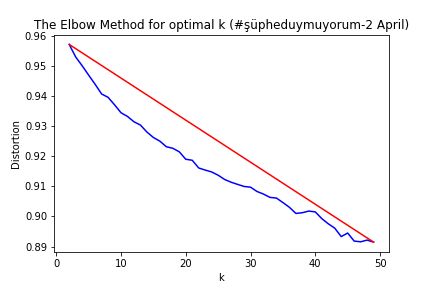

In [17]:
from IPython.display import Image
Image(filename='graphs/elbow_method_02.04.png')

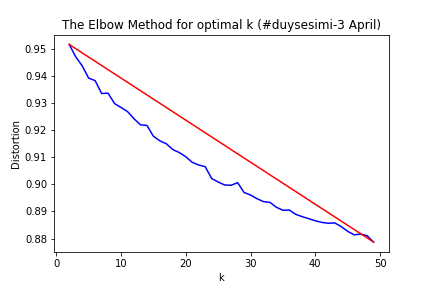

In [18]:
Image(filename='graphs/elbow_method_03.04.png')

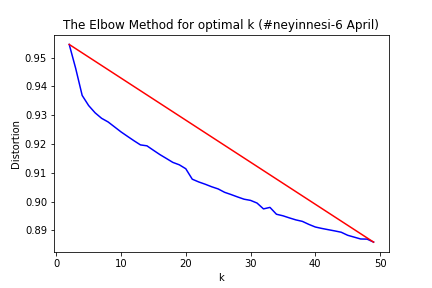

In [19]:
Image(filename='graphs/elbow_method_06.04.png') 

**Choose k = 20 for TF-IDF Approach**

From the diagrams, 20 will be good point where the curve starts to be linearized. 

However, it seems that there would be higher **k** values, which should be tested later

In [14]:
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
tweet_df['y'] = y_pred


#### Find out k for w2vec approach

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from tqdm import tqdm

# run kmeans with many different k
distortions = []
K = range(2, 70)
for kk in tqdm(K):
    k_means = KMeans(n_clusters=kk, random_state=42)
    k_means.fit(X_reduced_w2vec)
    distortions.append(sum(np.min(cdist(X_reduced_w2vec, k_means.cluster_centers_, 'euclidean'), axis=1)) / X_w2vec.shape[0])
    #print('Found distortion for {} clusters'.format(k))

100%|██████████| 68/68 [05:01<00:00,  4.43s/it]


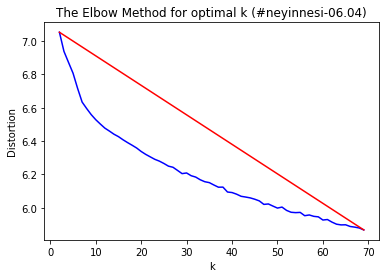

In [20]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method for optimal k ({}-{})'.format(hashtag_id, hashtag_day))
plt.savefig("graphs/elbow_method_w2vec_{}.png".format(hashtag_day))
plt.show()


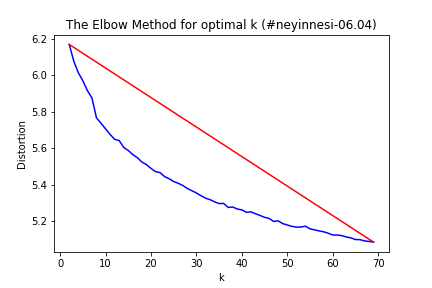

In [24]:
Image(filename='graphs/elbow_method_w2vec_06.04.png') 

**Choose k = 30 for Word2Vec Approach**

From the diagrams, 30 will be good point where the curve starts to be linearized. 

However, it seems that there would be higher **k** values, which should be tested later

In [29]:
k_w2vec = 20
kmeans = KMeans(n_clusters=k_w2vec, random_state=42)
y_pred_w2vec = kmeans.fit_predict(X_reduced_w2vec)
tweet_df['y_w2vec'] = y_pred_w2vec

In [36]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=50, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5224 samples in 0.834s...
[t-SNE] Computed neighbors for 5224 samples in 47.682s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5224
[t-SNE] Computed conditional probabilities for sample 2000 / 5224
[t-SNE] Computed conditional probabilities for sample 3000 / 5224
[t-SNE] Computed conditional probabilities for sample 4000 / 5224
[t-SNE] Computed conditional probabilities for sample 5000 / 5224
[t-SNE] Computed conditional probabilities for sample 5224 / 5224
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 122.278946
[t-SNE] KL divergence after 1000 iterations: 3.313040


In [37]:
X_embedded_w2vec = tsne.fit_transform(X_w2vec)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5224 samples in 0.191s...
[t-SNE] Computed neighbors for 5224 samples in 21.008s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5224
[t-SNE] Computed conditional probabilities for sample 2000 / 5224
[t-SNE] Computed conditional probabilities for sample 3000 / 5224
[t-SNE] Computed conditional probabilities for sample 4000 / 5224
[t-SNE] Computed conditional probabilities for sample 5000 / 5224
[t-SNE] Computed conditional probabilities for sample 5224 / 5224
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.152298
[t-SNE] KL divergence after 1000 iterations: 2.454116


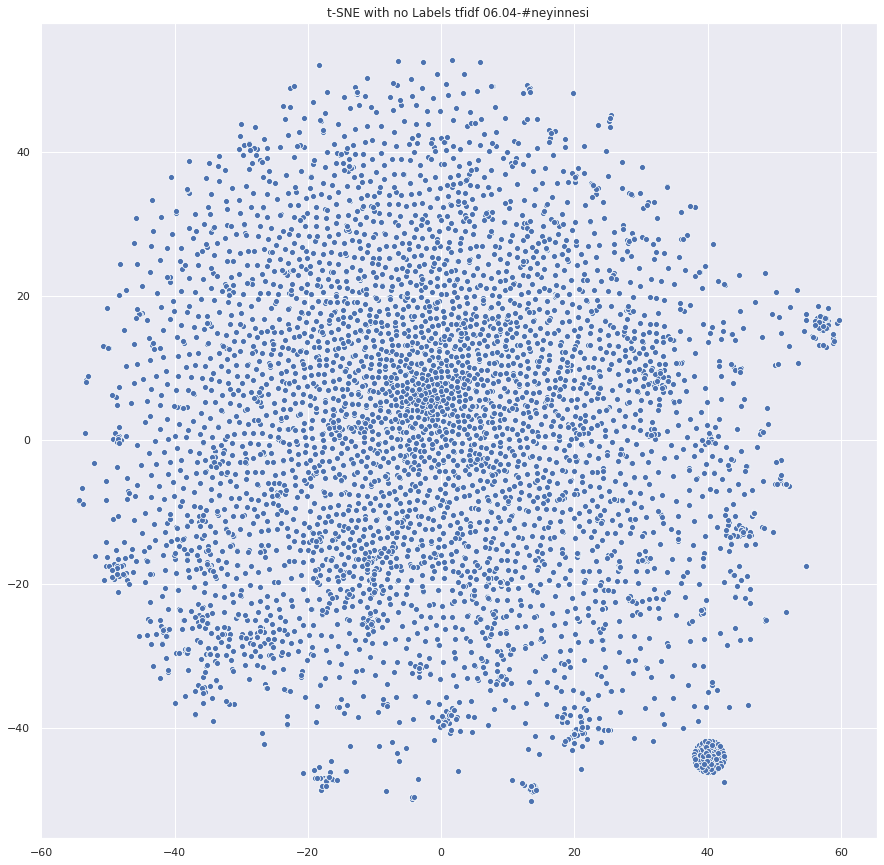

In [38]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)
plt.title('t-SNE with no Labels tfidf {}-{}'.format(hashtag_day, hashtag_id))
plt.savefig("t-sne_{}.png".format(hashtag_day))
plt.show()

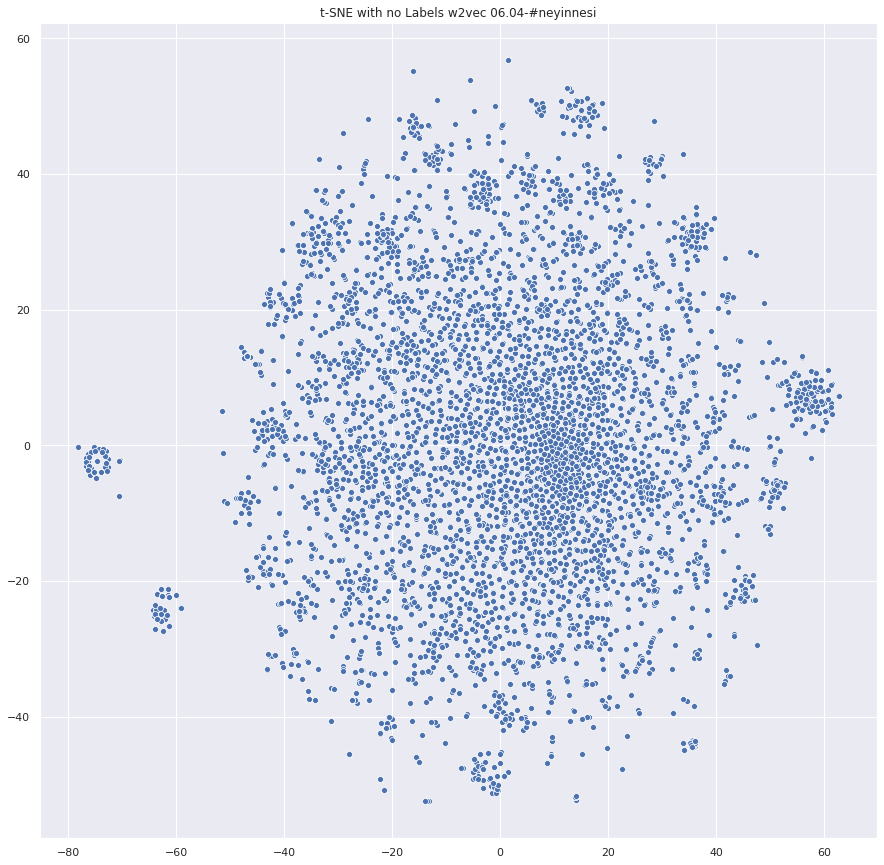

In [39]:
# plot
sns.scatterplot(X_embedded_w2vec[:,0], X_embedded_w2vec[:,1], palette=palette)
plt.title('t-SNE with no Labels w2vec {}-{}'.format(hashtag_day, hashtag_id))
plt.savefig("t-sne_w2vec_{}.png".format(hashtag_day))
plt.show()

### Comparison
By visual inspection, w2vec seems to be better. But this should be tested later with a supervised approach just like in the [notebook](https://www.kaggle.com/maksimeren/covid-19-literature-clustering#Dimensionality-Reduction-with-t-SNE) mentioned before

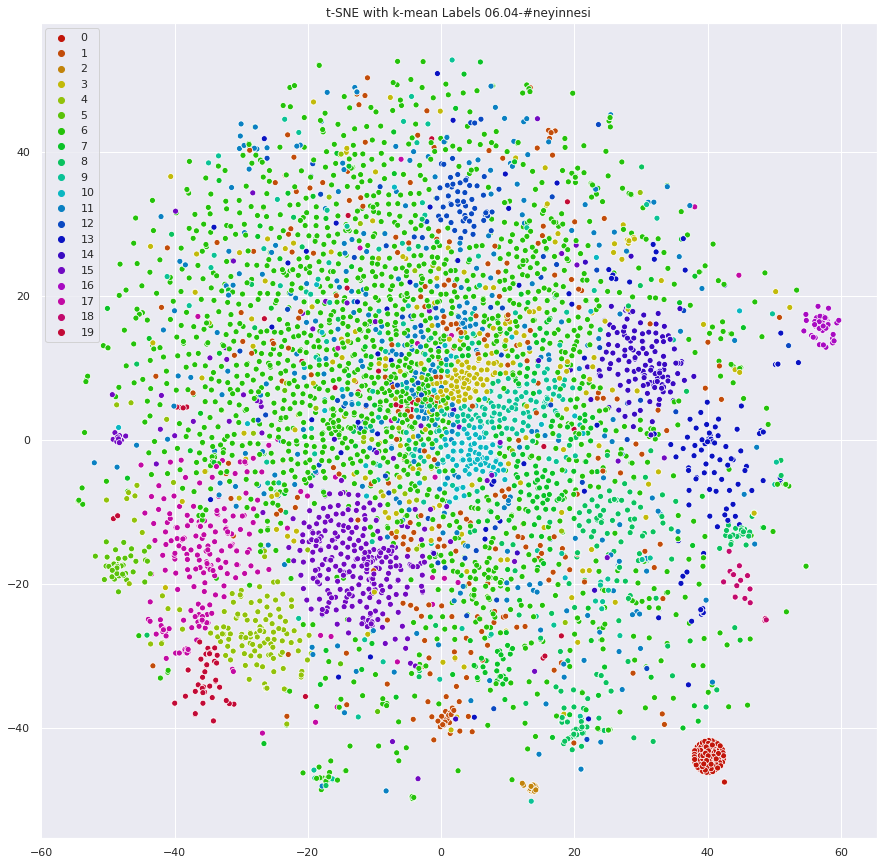

In [40]:
%matplotlib inline
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.hls_palette(k, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with k-mean Labels {}-{}'.format(hashtag_day, hashtag_id))
plt.savefig("graphs/clusters_tsne_{}.png".format(hashtag_day))
plt.show()

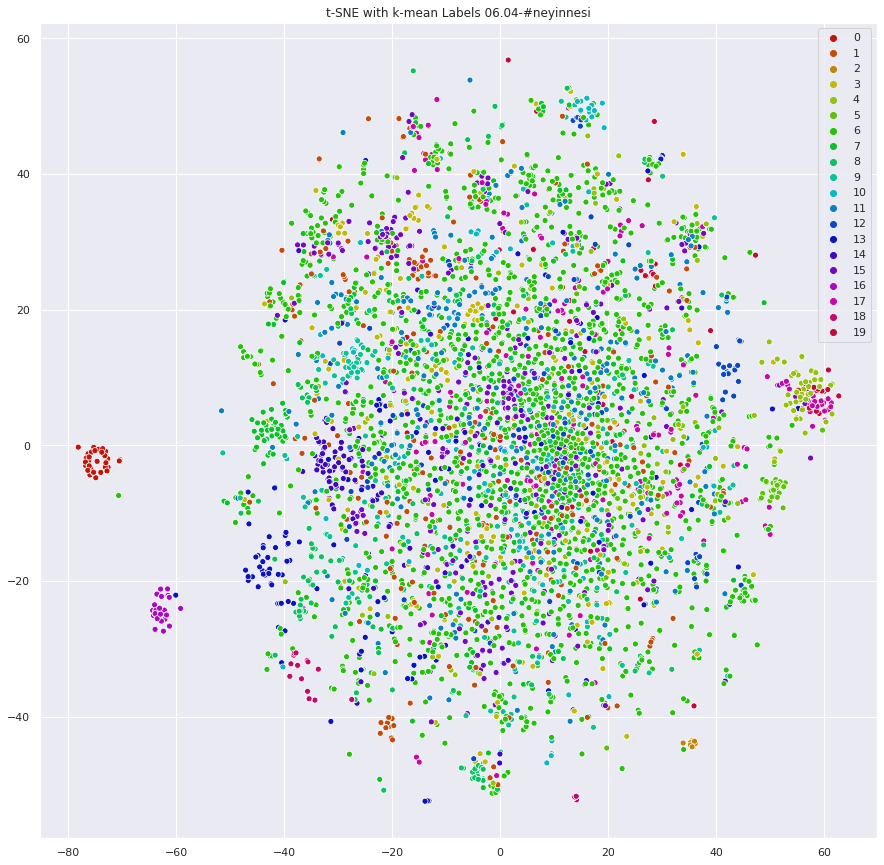

In [41]:
sns.scatterplot(X_embedded_w2vec[:,0], X_embedded_w2vec[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with k-mean Labels {}-{}'.format(hashtag_day, hashtag_id))
plt.savefig("graphs/clusters_tsne_w2vec_{}.png".format(hashtag_day))
plt.show()

In [31]:
tweet_df.to_csv('data/tweet_df_clustered.csv')

### Understand What Cluster is About

**Note:** First, k-means by TF-IDF vectorization is tested

#### LDA (Latent Dirichlet Allocation)
This approach is mainly adapted from the [Kaggle Notebook](https://www.kaggle.com/maksimeren/covid-19-literature-clustering#Dimensionality-Reduction-with-t-SNE)
In that notebook, this method is used to extract topics from cluster of papers. In my case tweets are much shorter than papers, which would be problematic

#### Most Frequent Ngrams
This would be simple and effective approach, which will be tested later.

In [17]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=3):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values

def lda_clustering(k, col):

    vectorizers = []

    for ii in range(0, k):
        # Creating a vectorizer
        vectorizers.append(CountVectorizer(ngram_range=(1, 5), stop_words=None, lowercase=True, token_pattern='[a-zA-ZâüğşıöçÜĞŞİÇÖ\-][a-zA-ZâüğşıöçÜĞŞİÇÖ\-]{2,}'))

    vectorized_data = []

    for current_cluster, cvec in enumerate(vectorizers):
        try:
            vec_data = cvec.fit_transform(tweet_df.loc[tweet_df[col] == current_cluster, 'processed_text'])
            vectorized_data.append(vec_data)
        except Exception as e:
            print("Not enough instances in cluster: " + str(current_cluster))
            print(e)
            vectorized_data.append(None)

    # number of topics per cluster
    NUM_TOPICS_PER_CLUSTER = 10

    lda_models = []
    for ii in range(0, k):
        # Latent Dirichlet Allocation Model
        lda = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='online',verbose=False, random_state=42)
        lda_models.append(lda)

    len(lda_models)

    clusters_lda_data = []

    for current_cluster, lda in enumerate(lda_models):
        # print("Current Cluster: " + str(current_cluster))

        if vectorized_data[current_cluster] != None:
            clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))
            
    all_keywords = []
    for current_vectorizer, lda in enumerate(lda_models):
        # print("Current Cluster: " + str(current_vectorizer))

        if vectorized_data[current_vectorizer] != None:
            all_keywords.append(selected_topics(lda, vectorizers[current_vectorizer]))
            
    return all_keywords


In [19]:
def most_freq_ngrams_cluster(k, col):
    
    c_vec = CountVectorizer(ngram_range=(2, 5), lowercase=True)
    
    for current_cluster in range(k):
        text = tweet_df[tweet_df[col] == current_cluster]['processed_text'].values

        # input to fit_transform() should be an iterable with strings
        ngrams = c_vec.fit_transform(text)

        # needs to happen after fit_transform()
        vocab = c_vec.vocabulary_

        count_values = ngrams.toarray().sum(axis=0)

        # output n-grams
        iii = 0
        for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
            print(ng_count, ng_text)
            iii += 1
            if iii == 10:
                break
        
        print()

#### TF-IDF Vectorization - LDA Topic Clustering

In [20]:
k = 20
col = 'y'

all_keywords = lda_clustering(k, col)

In [34]:
k = 20
col = 'y'

most_freq_ngrams_cluster(k, col)

89 sürekli ihtiyaç duymak program
89 sürekli ihtiyaç duymak
89 sürekli ihtiyaç
89 sürekli güvenlik ihtiyaç
89 sürekli güvenlik
89 pozisyon işçi okul sürekli güvenlik
89 pozisyon işçi okul sürekli
89 pozisyon işçi okul
89 pozisyon işçi
89 okul sürekli güvenlik ihtiyaç

29 yardım almak
20 bayram ikramiye
17 para almak
17 maaş almak
12 asgari ücret
10 almak yardım
9 önlem almak
9 ikramiye almak
9 emekli maaş
8 geri almak

46 us öğreti
23 öğreti kurs
22 öğreti kurs mart sonunda bitmek
22 öğreti kurs mart sonunda
22 öğreti kurs mart
22 öğreti gün kararname çıkmak müjde
22 öğreti gün kararname çıkmak
22 öğreti gün kararname
22 öğreti gün
22 öğreti durum göz bulunmak göstermek

39 gelir yok
27 para yok
15 iş yok
14 destek yok
13 yok demek
10 tohum destek
10 gelmek yok
9 yok para
8 çiftçi tohum
8 yok devlet

131 atatürk havalimanı
60 havalimanı hastane
53 atatürk havalimanı hastane
26 şehir hastane
21 hastane yol
19 ekrem imamoğlu
17 sahra hastane
17 imamoğlu atatürk
16 imamoğlu atatürk havali

### How to measure social interaction over clustered tweets

This is a question that should be answered later on. I suppose the mean values of favorites and retweet counts over a cluster indicates significancy of the topic

Other fields are also added to `summary_df` for inspection

In [21]:
summary_df_arr = []

for cluster_id, cluster_df in tweet_df.groupby(by="y"):
    row = {}
    row['cluster_id'] = cluster_id
    row['keywords'] = " : ".join(all_keywords[cluster_id])
    row['num_of_tweets'] = cluster_df.shape[0]
    row['favorite_mean'] = cluster_df['favorite_count'].mean()
    row['retweet_mean'] = cluster_df['retweet_count'].mean()
    row['user_follower_mean'] = cluster_df['user_follower_count'].mean()
    row['favorite_sum'] = cluster_df['favorite_count'].sum()
    row['retweet_sum'] = cluster_df['retweet_count'].sum()
    row['user_follower_sum'] = cluster_df['user_follower_count'].sum()
    summary_df_arr.append(row)

summary_df = pd.DataFrame(summary_df_arr)

In [22]:
pd.set_option('display.max_colwidth', -1)
summary_df.sort_values(by="favorite_mean", ascending=False)

/home/kemal/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


cluster_id  \
17  17           
4   4            
13  13           
6   6            
5   5            
11  11           
19  19           
0   0            
2   2            
8   8            
1   1            
15  15           
18  18           
16  16           
9   9            
3   3            
12  12           
14  14           
7   7            
10  10           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        keywords  \
17  tekâlif : milliye : tekâlif milliye : millet : ten : reis ten : yaşamak toplum düşman : düşman namus : zıplamak demek                                                                                                                                                                                                                                                                                                                                                                          
4   hastane : havalimanı : atatürk havalimanı : atatürk : demek : önem : yol : ekrem : imam                                                                                                                                                                                                                                                                                                                                                                                                        
13  etmek : makam : hasta : bakan : sağlık bakan : diş sağlık : ağız : sağlık : personel : çalışmak : prim : değişik : istemek : vermek : demek : konuşmak : açmak : kesmek                                                                                                                                                                                                                                                                                                                        
6   demek : savaş : çalışmak : sayı : bağış : belediye : ödemek : görmek : chp : ülke : gelmek : gün : yardım : koymak : fatura : gitmek : sosyal : getirmek : adam : vermek : müşteri : indirim : devlet : sigorta : dolar                                                                                                                                                                                                                                                                        
5   kemal : atatürk : mustafa : yıl : mustafa kemal : mustafa kemal atatürk : fotoğraf : halk : zor : yeni slogan allah : atatürk meclis zor : yeni slogan : rıza gazi : sağ : ulu önder mustafa : ummak yıl şükretmek anlamak : cumhurbaşkanı : sevmek zaman dara : manev varlık                                                                                                                                                                                                                  
11  yardım : etmek : yardım etmek : mağdur : vermek : kabul : kabul etmek : devam etmek : devam : devlet : demek : destek : zor : geçinmek : savaş : mansur : gün : ihtiyaç : personel                                                                                                                                                                                                                                                                                                             
19  katliam : atatürk : katliam atatürk : tahliye : vermek : insan : cora : hastane insan testi meclis katliam : atatürk havalimanı : havalimanı : etmek : suç : titan katliam coach carter radomir : katliam coach : öğrenci : allah tevekkü

In [23]:
summary_df.to_csv('data/summary_df_tf_idf.csv')

#### Word2Vec Vectorization - LDA Topic Clustering

In [32]:
k = 20
col = 'y_w2vec'

all_keywords_w2vec = lda_clustering(k, col)

In [33]:
summary_df_arr = []

for cluster_id, cluster_df in tweet_df.groupby(by=col):
    row = {}
    row['cluster_id'] = cluster_id
    row['keywords'] = " : ".join(all_keywords_w2vec[cluster_id])
    row['num_of_tweets'] = cluster_df.shape[0]
    row['favorite_mean'] = cluster_df['favorite_count'].mean()
    row['retweet_mean'] = cluster_df['retweet_count'].mean()
    row['user_follower_mean'] = cluster_df['user_follower_count'].mean()
    row['favorite_sum'] = cluster_df['favorite_count'].sum()
    row['retweet_sum'] = cluster_df['retweet_count'].sum()
    row['user_follower_sum'] = cluster_df['user_follower_count'].sum()
    summary_df_arr.append(row)

summary_df_w2vec = pd.DataFrame(summary_df_arr)

In [34]:
pd.set_option('display.max_colwidth', -1)
summary_df_w2vec.sort_values(by="favorite_mean", ascending=False)

/home/kemal/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


cluster_id  \
5   5            
1   1            
15  15           
13  13           
8   8            
11  11           
18  18           
10  10           
9   9            
6   6            
19  19           
16  16           
14  14           
7   7            
4   4            
2   2            
0   0            
12  12           
3   3            
17  17           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             keywords  \
5   devlet : orman : yardım : toplamak : devlet yardım : makam : parti : millet : gelir : varmak ner : türkiye : belediye : demek : maske : almak : satmak : çıkmak : vatandaş                                                                                                                                                                                                                                                                                                                                                                          
1   güzel : iyi : maske : ner : dünya kıymet : almak : ekonomi : yönetmek : parti : anlaşmak : etmek : insan : demek : akşam : iyi hasta : virüs iyi denge bozmak : sevgi başlamak                                                                                                                                                                                                                                                                                                                                                                      
15  öğreti : çıkmak : kararname : etmek : vermek : kadro : çalışmak : maske : almak : yok : sağlık : devlet : atmak : atamak : nitelik : tayyip : the : demek : düşmek : istemek : ölmek : kapamak : yardım                                                                                                                                                                                                                                                                                                                                             
13  masal : hikâye : fıkra : çocuk : devlet : etmek : maske : parti : yok : allah : görmek : aman : demek : aile : çıkmak : ses : yaşamak : almak : haketmek : kardeş : bayram : sarmak : dünya                                                                                                                                                                                                                                                                                                                                                         
8   atatürk havalimanı : havalimanı : atatürk : hastane : havalimanı hastane : havaalanı                                                                                                                                                                                                                                                                                                                                                                                                                                                                
11  tekâlif milliye : milliye : tekâlif : atatürk : demek : mustafa : mustafa kemal : hastane : etmek : yok : belediye : istanbul : köy : vermek : haber : çalışmak : ilçe : muhtar : izmir : almak : kaymakam : hak                                                                                                                                                                                               

In [35]:
summary_df_w2vecvecvec.to_csv('data/summary_df_w2vec.csv')

NameError: name 'summary_df_w2vecvecvec' is not defined

## Conclusion

The day which we inspected in this notebook was 6 April. On this day, president Erdoğan give a speech on 19.00. In `summary_df` the most interacted tweet cluster seems to be related with what president Erdoğan says about *Tekalifi Milliye emirleri*, which is an interesting result that complies with the agenda.  This topic was a significant one on that day.

On the other hand, though it is not perfect, my approach is successful on clustering tweets extracting different topic against which people reacted.

This work is far from conclusive but seems to have a potential to make improvements. I would like to discuss possible improvements.

* Vectorizing tweets with w2vec, only important words can be chosen using tf-idf approach
* Understanding clusters, most frequent ngrams or other methods might be more efficient, which should be tested.
* The clusters can be attempted to match with the news of the day
* Sentiment analysis can be integrated to analyze different tweet clusters

In [41]:
# function to print out classification model report
def classification_report(model_name, test, pred):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    
    print(model_name, ":\n")
    print("Accuracy Score: ", '{:,.3f}'.format(float(accuracy_score(test, pred)) * 100), "%")
    print("     Precision: ", '{:,.3f}'.format(float(precision_score(test, pred, average='macro')) * 100), "%")
    print("        Recall: ", '{:,.3f}'.format(float(recall_score(test, pred, average='macro')) * 100), "%")
    print("      F1 score: ", '{:,.3f}'.format(float(f1_score(test, pred, average='macro')) * 100), "%")

In [42]:
from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test, y_train, y_test = train_test_split(X.toarray(),y_pred, test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

X_train size: 4179
X_test size: 1045 



In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

# SGD instance
sgd_clf = SGDClassifier(max_iter=10000, tol=1e-3, random_state=42, n_jobs=4)
# train SGD
sgd_clf.fit(X_train, y_train)

# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3, n_jobs=4)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Training Set)", y_train, sgd_pred)

Stochastic Gradient Descent Report (Training Set) :

Accuracy Score:  90.596 %
     Precision:  93.714 %
        Recall:  90.745 %
      F1 score:  92.100 %


In [44]:
# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=3, n_jobs=4)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Training Set)", y_test, sgd_pred)

Stochastic Gradient Descent Report (Training Set) :

Accuracy Score:  82.392 %
     Precision:  89.695 %
        Recall:  76.186 %
      F1 score:  81.164 %


In [45]:
sgd_cv_score = cross_val_score(sgd_clf, X.toarray(), y_pred, cv=10)
print("Mean cv Score - SGD: {:,.3f}".format(float(sgd_cv_score.mean()) * 100), "%")

Mean cv Score - SGD: 91.290 %


In [46]:
tweet_df['y_w2vec'].values

array([2, 2, 2, ..., 7, 2, 2], dtype=int32)

In [47]:
# test set size of 20% of the data and the random seed 42 <3
X_train, X_test, y_train, y_test = train_test_split(X_w2vec,tweet_df['y_w2vec'].values, test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

# SGD instance
sgd_clf = SGDClassifier(max_iter=10000, tol=1e-3, random_state=42, n_jobs=4)
# train SGD
sgd_clf.fit(X_train, y_train)

# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3, n_jobs=4)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Training Set)", y_train, sgd_pred)

# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=3, n_jobs=4)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Training Set)", y_test, sgd_pred)

sgd_cv_score = cross_val_score(sgd_clf, X_w2vec,tweet_df['y_w2vec'].values, cv=10)
print("Mean cv Score - SGD: {:,.3f}".format(float(sgd_cv_score.mean()) * 100), "%")

X_train size: 4179
X_test size: 1045 

Stochastic Gradient Descent Report (Training Set) :

Accuracy Score:  46.183 %
     Precision:  55.187 %
        Recall:  50.879 %
      F1 score:  52.510 %
Stochastic Gradient Descent Report (Training Set) :

Accuracy Score:  39.234 %
     Precision:  47.582 %
        Recall:  40.275 %
      F1 score:  42.599 %


/home/kemal/.anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean cv Score - SGD: 48.660 %
